In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math

from sklearn.cluster import KMeans
from scipy.special import factorial
from scipy.stats import poisson
from scipy.optimize import minimize

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

%matplotlib inline

In [61]:
###parameters for forcing
P = 5
M = 5
alpha_mn = np.random.randn(P+1,M+1)
alpha_mn_noise = np.random.randn(P+1,M+1)

###phase construction
def F_w_phi(alpha_mn,ww,phi,P,M):
    ps = np.arange(0,P+1,1)
    ms = np.arange(0,M+1,1)
    F = 0
    for pi,pp in enumerate(ps):
        for mi,mm in enumerate(ms):
            F = F + alpha_mn[pi,mi]*np.exp(-((-1)**0.5)*mm*phi)*ww**pp + \
            alpha_mn[pi,mi]*np.exp(-((-1)**0.5)*-mm*phi)*ww**pp
    return F
    

/Users/Macintosh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


Text(0, 0.5, '$\\omega/2\\pi$')

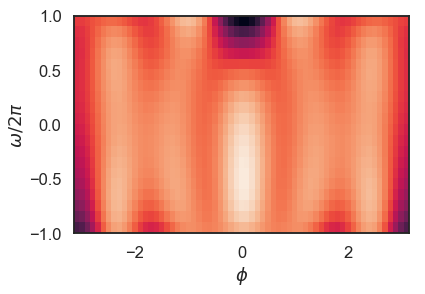

In [62]:
###plot phase space
def show_phase(alpha_mn):
    ww = np.arange(-1,1,0.1)
    phi = np.arange(-np.pi,np.pi,0.1)
    Fwp = np.zeros((len(ww),len(phi)))
    for wi,w_ in enumerate(ww):
        for pi,p_ in enumerate(phi):
            Fwp[wi,pi] = F_w_phi(alpha_mn, w_, p_, P, M)
    return Fwp

plt.imshow(show_phase(alpha_mn),extent=[-np.pi,np.pi,-1,1],aspect='auto')
plt.xlabel('$\phi$')
plt.ylabel('$\omega/2\pi$')

/Users/Macintosh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


Text(0, 0.5, '$\\omega/2\\pi$')

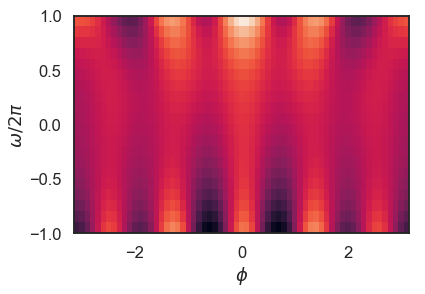

In [63]:
plt.imshow(show_phase(alpha_mn_noise),extent=[-np.pi,np.pi,-1,1],aspect='auto')
plt.xlabel('$\phi$')
plt.ylabel('$\omega/2\pi$')

In [101]:
###Langevin equation
def wrap2pi(phase):
    return (phase + np.pi) % (2 * np.pi) - np.pi

dt = 0.01
T = 10
time = np.arange(0,T,dt)
phis = np.zeros(len(time))
ws = np.zeros(len(time))
phis[0] = np.random.rand()*2*np.pi-np.pi
ws[0] = np.random.ranf()*2-1
for tt in range(0,len(time)-1):
    phis[tt+1] = phis[tt] + dt*ws[tt]
    ws[tt+1] = ws[tt] + dt*(F_w_phi(alpha_mn, ws[tt], phis[tt], P, M)) \
    + dt**0.5*(F_w_phi(alpha_mn_noise, ws[tt], phis[tt], P, M)*np.random.randn()*0.1)
    #phis[tt+1] = wrap2pi(phis[tt+1])
    ws[tt+1] = wrap2pi(ws[tt+1])

/Users/Macintosh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


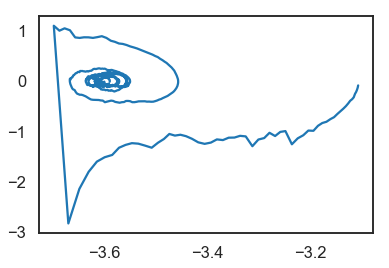

In [102]:
plt.plot(phis,ws)#/np.pi/2)

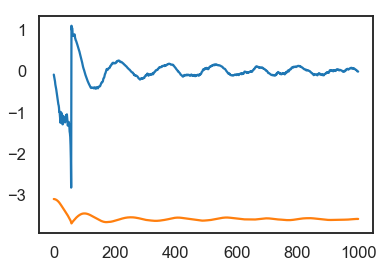

In [103]:
plt.plot(ws)
plt.plot(phis)